In [5]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline  

In [6]:
data=[]
nums=15
for i in range(nums):
    data.append(np.loadtxt("./Data_Leap//Newt_leap_data_dt_"+str(i+1)+"_.txt"))
data = np.array(data)

In [7]:
dt=5.e-2
dt_file=[]
for i in range(nums):
    dt_file.append(dt)
    dt = dt/(2)

In [8]:
for i in range (nums):
    print(data[i][1,6],dt_file[i])

(0.050000000000000003, 0.05)
(0.025000000000000001, 0.025)
(0.012500000000000001, 0.0125)
(0.0062500000000000003, 0.00625)
(0.0031250000000000002, 0.003125)
(0.0015625000000000001, 0.0015625)
(0.00078125000000000004, 0.00078125)
(0.00039062500000000002, 0.000390625)
(0.00019531250000000001, 0.0001953125)
(9.7656250000000005e-05, 9.765625e-05)
(4.8828125000000003e-05, 4.8828125e-05)
(2.4414062500000001e-05, 2.44140625e-05)
(1.2207031250000001e-05, 1.220703125e-05)
(6.1035156250000003e-06, 6.103515625e-06)
(3.0517578125000002e-06, 3.0517578125e-06)


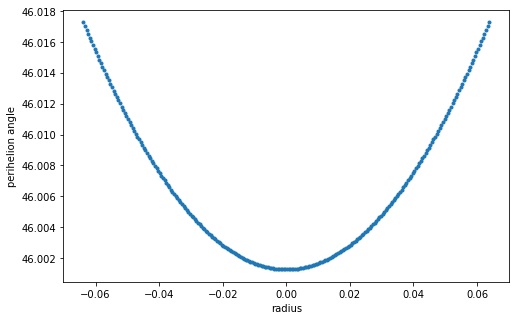

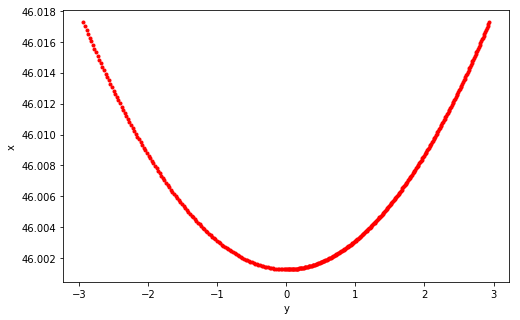

In [9]:
# Conditions that to make sure we are looking at the perihelion after one round!
data3=[]
for i in range(np.shape(data)[0]):
    data1= data[i][data[i][:,3]>46-1.3]
    data2=data1[data1[:,3]<46+1.3]
    data3.append(data2 [data2[:,0]>4])
# TEST:
l=7;
fig= plt.figure(figsize=(8,5))
plt.plot(data3[l][:,4],data3[l][:,3],".")
plt.xlabel('radius')
plt.ylabel('perihelion angle')
plt.show()
fig= plt.figure(figsize=(8,5))
plt.plot(data[l][:,2],data[l][:,3],"r.")
plt.xlabel('y')
plt.ylabel('x')
plt.show()

In [10]:
# Sorting according to the having minimum radius!
per_data=[]
perihelions=[]
for i in range(np.shape(data)[0]):
    per_data.append( data3[i][np.argsort(data3[i][:, 3])])
# data2[np.argsort(data2[::-1, 4])][:,3];
# Finding the 3 points around the minimum radius
    perihelions.append(per_data[i][:10,3:5])
# TEST:
# fig= plt.figure(figsize=(8,5))
# plt.xlabel('radius')
# plt.ylabel('perihelion angle')
# plt.plot(perihelions[:,1],perihelions[:,0],"bo")
# plt.show()

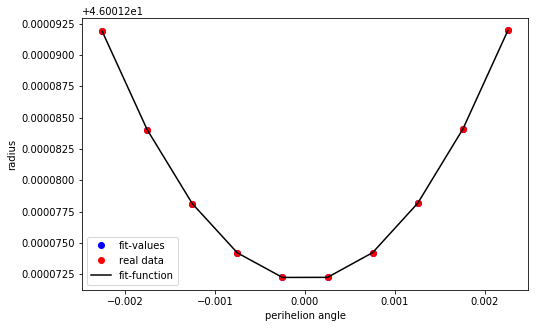

In [11]:
# Now we are going to fit a quadratic function to the three points and find the minimum
new_x=[]
fit=[]
curve=[]
fit_func=[]
r_crit=[]
sec_derv=[]
x_min=[]
y_min=[]
for i in range(np.shape(data)[0]):

    new_x.append(np.linspace(np.min(perihelions[i][:,1]), np.max(perihelions[i][:,1]), num =10 ))
    fit.append(np.polyfit(perihelions[i][:,1],perihelions[i][:,0],2))
    curve.append((np.polyval(fit[i], new_x[i])))
    fit_func.append(np.poly1d(fit[i]));
#     crit =  curve[i].deriv().r
    crit = fit_func[i].deriv().r
    r_crit.append(crit[crit.imag==0].real)
    sec_derv.append(fit_func[i].deriv(2)(r_crit[i]));
    x_min.append(r_crit[i][sec_derv[i]>0][0])
    y_min.append(fit_func[i](x_min[i]))

# Tests:
fig= plt.figure(figsize=(8,5))
for l in [7]:
#     l=0
    plt.plot(new_x[l],curve[l],"bo",label="fit-values")
    plt.plot(perihelions[l][:,1],perihelions[l][:,0],"ro",label="real data")
    plt.plot(new_x[l],fit_func[l](new_x[l]),"k-",label="fit-function")

    plt.xlabel('perihelion angle')
    plt.ylabel('radius')
    plt.legend()

plt.show()


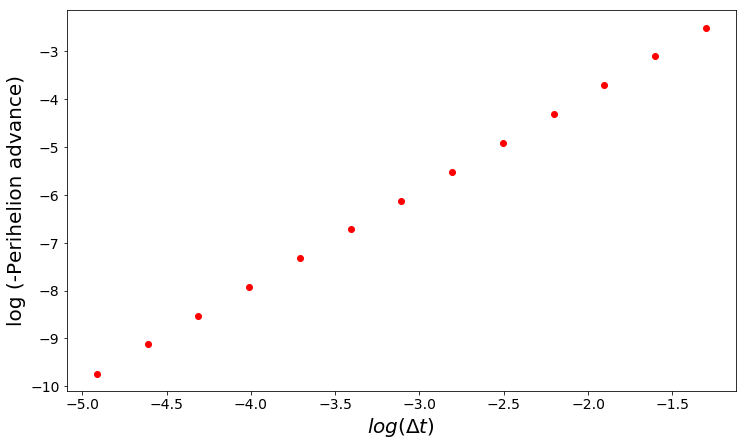

In [12]:
fig= plt.figure(figsize=(12,7))
x = np.linspace(-4,-0.1,50)
for l in range(nums-2):
#     l=1
    # compute local minima 
    # excluding range boundaries
    plt.plot( np.log10(dt_file[l]), np.log10(np.abs((x_min[l]))), 'ro' )
#     plt.plot(x,-1.92+2 * (x),"b-")
#     plt.plot(x,(x),"b-")

#     plt.plot(new_x[l],fit_func[l](new_x[l]),"k-",label="fit-function")
    plt.xlabel("$log(\Delta t)$",fontsize=20)
    plt.ylabel("log (-Perihelion advance)",fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.tick_params(axis='both', which='minor', labelsize=14)
#     plt.yscale('symlog')
#     plt.xscale('log')
#     plt.yticks(np.arange(0.999, 1, step=1.e-3))
    plt.legend()
plt.show()

In [26]:
#Fit Regression
# from scipy import stats
# x_fit=np.log10(dt_file)
# y_fit=np.log10(np.abs(x_min))
# slope, intercept, r_value, p_value, std_err = stats.linregress(x_fit,y_fit)

In [13]:
x_fit=np.log10(dt_file)
y_fit=np.log10(np.abs(x_min))
from scipy.optimize import curve_fit
def f(x, A, B): # this is your 'straight line' y=f(x)
    return A*x + B

A,B = curve_fit(f, x_fit[:13], y_fit[:13])[0] # your data x, y to fit

In [14]:
# import numpy.polynomial.polynomial as poly
# coefs = poly.polyfit(x_fit, y_fit, 2)
# x_new = np.linspace(-4,-0.1,50)
# ffit = poly.polyval(x_new, coefs)

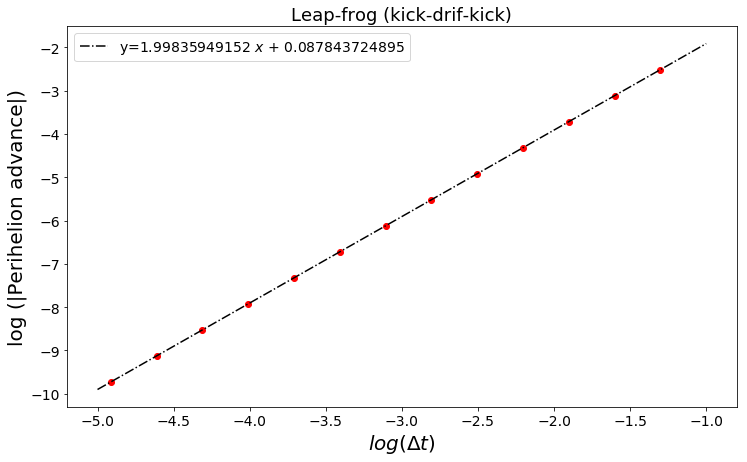

In [15]:
fig= plt.figure(figsize=(12,7))
x = np.linspace(-5,-1,50)
for l in range(nums-2):
#     l=1
    # compute local minima 
    # excluding range boundaries
    plt.plot( np.log10(dt_file[l]), np.log10(np.abs((x_min[l]))), 'ro' )
#     plt.plot(x,-1.92+2 * (x),"b-")
    
#     plt.plot(x_new, ffit)
#     plt.plot(x,(x),"b-")

#     plt.plot(new_x[l],fit_func[l](new_x[l]),"k-",label="fit-function")
    plt.xlabel("$log(\Delta t)$",fontsize=20)
    plt.ylabel("log (|Perihelion advance|)",fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.tick_params(axis='both', which='minor', labelsize=14)
#     plt.yscale('symlog')
#     plt.xscale('log')
#     plt.yticks(np.arange(0.999, 1, step=1.e-3))
plt.plot(x,B+ A * (x),"k-.",label="y="+str(A)+" $x$ + "+str(B))
plt.legend(fontsize=14)
plt.title("Leap-frog (kick-drif-kick)",fontsize=18)
plt.show()

In [19]:
#Makefiles
np.savetxt('perihelion_leapfrog.txt', (dt_file,x_min), fmt='%7e') 

In [17]:
print(A,B)

(1.9983594915225327, 0.087843724895014935)
